In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [103]:
River_Arno = pd.read_csv('./datasets/River_Arno.csv')

In [104]:
River_Arno

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [105]:
River_Arno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [106]:
River_Arno.shape

(8217, 17)

### Filled Entries

<AxesSubplot:>

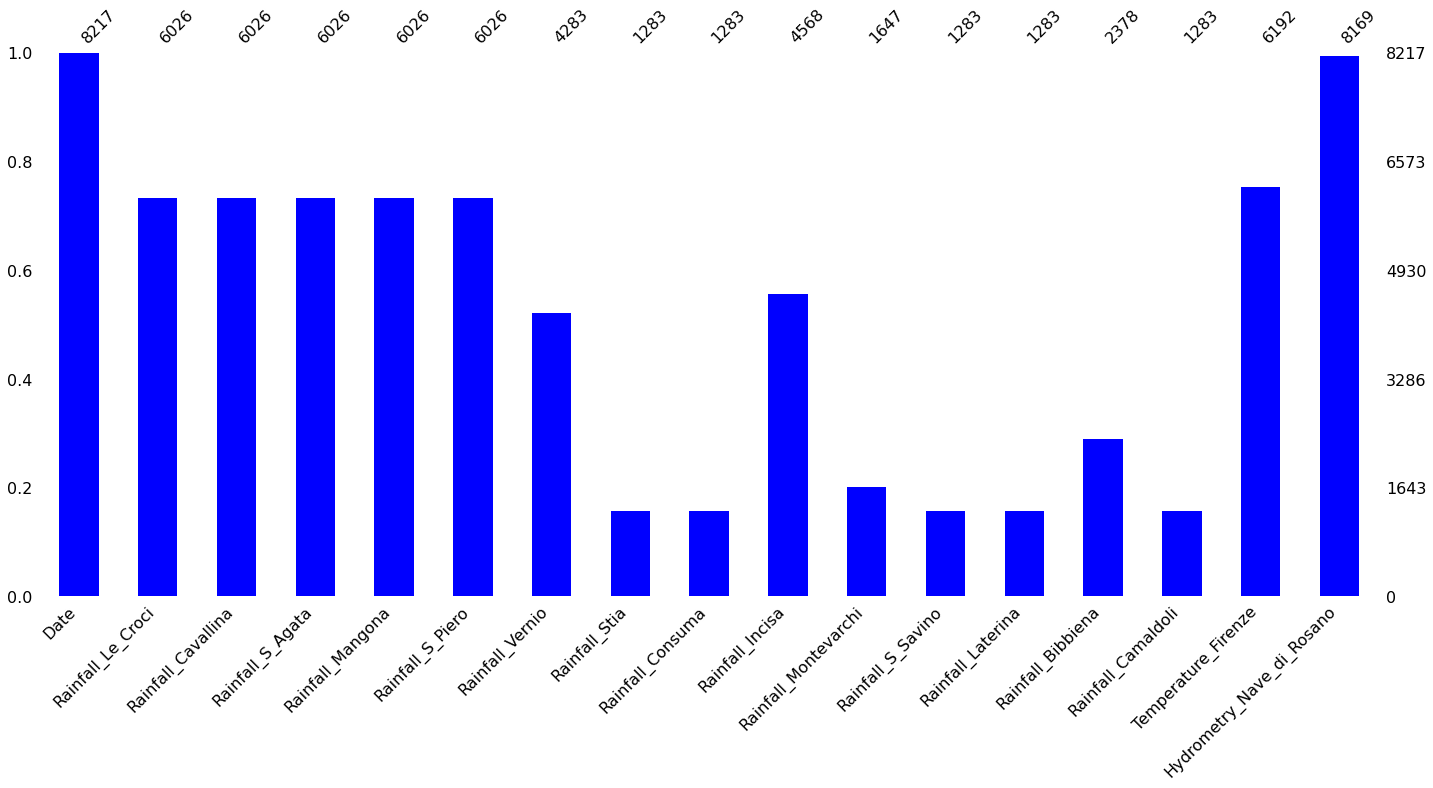

In [107]:
msno.bar(River_Arno,color='b')

In [108]:
# River_Arno = River_Arno.drop(River_Arno['Hydrometry_Nave_di_Rosano'].isnull().sum(),axis=0)


In [109]:
# River_Arno['Hydrometry_Nave_di_Rosano'].isnull().sum()

### Dates starting and ending values

In [110]:
print('starting date:', River_Arno.Date.values[[0,-1]][0])
print('ending date:', River_Arno.Date.values[[0,-1]][1])


starting date: 01/01/1998
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

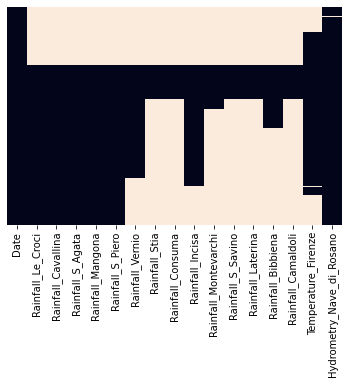

In [111]:
sns.heatmap(River_Arno.isnull(),yticklabels=False,cbar=False)

In [112]:
data=River_Arno.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

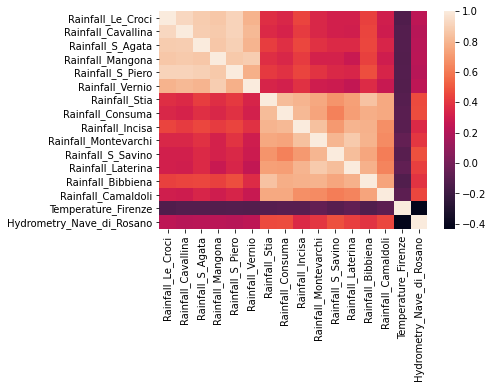

In [113]:
sns.heatmap(data.corr())

In [114]:
features_nan=[features for features in River_Arno.columns if River_Arno[features].isnull().sum()>1 and River_Arno[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(River_Arno[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Le_Croci 26.6642 % missing 
Rainfall_Cavallina 26.6642 % missing 
Rainfall_S_Agata 26.6642 % missing 
Rainfall_Mangona 26.6642 % missing 
Rainfall_S_Piero 26.6642 % missing 
Rainfall_Vernio 47.8764 % missing 
Rainfall_Stia 84.386 % missing 
Rainfall_Consuma 84.386 % missing 
Rainfall_Incisa 44.4079 % missing 
Rainfall_Montevarchi 79.9562 % missing 
Rainfall_S_Savino 84.386 % missing 
Rainfall_Laterina 84.386 % missing 
Rainfall_Bibbiena 71.06 % missing 
Rainfall_Camaldoli 84.386 % missing 
Temperature_Firenze 24.644 % missing 
Hydrometry_Nave_di_Rosano 0.5842 % missing 


In [115]:
'''
Columns that are going to be dropped

'Date',
'Hydrometry_Nave_di_Rosano', # Target Variable
'Rainfall_S_Savino',
'Rainfall_Consuma',
'Rainfall_Laterina',
'Rainfall_Camaldoli',
'Rainfall_Stia',
'',
'Rainfall_Montevarchi',
'Rainfall_Bibbiena',
'Rainfall_Incisa'

'''

"\nColumns that are going to be dropped\n\n'Date',\n'Hydrometry_Nave_di_Rosano', # Target Variable\n'Rainfall_S_Savino',\n'Rainfall_Consuma',\n'Rainfall_Laterina',\n'Rainfall_Camaldoli',\n'Rainfall_Stia',\n'',\n'Rainfall_Montevarchi',\n'Rainfall_Bibbiena',\n'Rainfall_Incisa'\n\n"

In [116]:
River_Arno_corr = River_Arno.drop(['Rainfall_S_Savino','Rainfall_Consuma','Rainfall_Laterina','Rainfall_Camaldoli','Rainfall_Stia','Date','Rainfall_Montevarchi','Rainfall_Bibbiena','Rainfall_Incisa'],axis=1)

<AxesSubplot:>

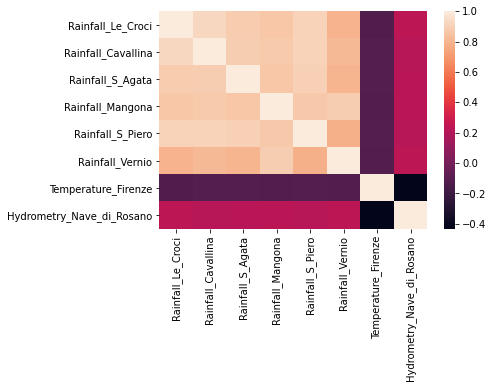

In [117]:
sns.heatmap(River_Arno_corr.corr())

In [118]:
a = River_Arno_corr

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Le_Croci 26.6642 % missing 
Rainfall_Cavallina 26.6642 % missing 
Rainfall_S_Agata 26.6642 % missing 
Rainfall_Mangona 26.6642 % missing 
Rainfall_S_Piero 26.6642 % missing 
Rainfall_Vernio 47.8764 % missing 
Temperature_Firenze 24.644 % missing 
Hydrometry_Nave_di_Rosano 0.5842 % missing 


### Imputation

Rainfall_Le_Croci

In [119]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [120]:
x=a['Rainfall_Le_Croci']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     3779
0.2      342
0.4      141
0.8       89
0.6       77
        ... 
33.2       1
36.8       1
45.8       1
36.4       1
39.6       1
Name: Rainfall_Le_Croci, Length: 230, dtype: int64> 
  mean:  
  3.1298705609027775 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [121]:
a['Rainfall_Le_Croci']=a['Rainfall_Le_Croci'].median()

Rainfall_Cavallina

In [122]:
x=a['Rainfall_Cavallina']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     4124
0.2      270
0.4      114
0.6       65
1.2       58
        ... 
63.2       1
70.8       1
39.2       1
66.2       1
30.4       1
Name: Rainfall_Cavallina, Length: 219, dtype: int64> 
  mean:  
  2.674742781281121 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [123]:
a['Rainfall_Cavallina']=a['Rainfall_Cavallina'].fillna(a['Rainfall_Cavallina'].median())

Rainfall_S_Agata

In [124]:
x=a['Rainfall_S_Agata']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     3755
0.2      378
0.4      137
0.6       86
1.0       72
        ... 
37.0       1
18.0       1
46.0       1
43.4       1
57.8       1
Name: Rainfall_S_Agata, Length: 207, dtype: int64> 
  mean:  
  2.670063060073033 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [125]:
a['Rainfall_S_Agata']=a['Rainfall_S_Agata'].fillna(a['Rainfall_S_Agata'].median())

Rainfall_Mangona

In [126]:
x=a['Rainfall_Mangona']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0      3822
0.2       291
0.4       107
0.8        86
0.6        85
         ... 
27.8        1
108.6       1
37.0        1
34.2        1
36.8        1
Name: Rainfall_Mangona, Length: 247, dtype: int64> 
  mean:  
  3.3406571523398827 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [127]:
a['Rainfall_Mangona']=a['Rainfall_Mangona'].fillna(a['Rainfall_Mangona'].median())

Rainfall_S_Piero

In [128]:
x=a['Rainfall_S_Piero']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     3679
0.2      545
0.4      148
0.6       81
0.8       72
        ... 
53.2       1
26.2       1
52.4       1
34.6       1
59.2       1
Name: Rainfall_S_Piero, Length: 206, dtype: int64> 
  mean:  
  2.4712246929970267 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [129]:
a['Rainfall_S_Piero']=a['Rainfall_S_Piero'].fillna(a['Rainfall_S_Piero'].median())

Rainfall_Vernio

In [130]:
x=a['Rainfall_Vernio']
cal(x)

null_values:  
  3934 
  count_values:  
  <bound method Series.unique of 0.0     2666
0.2      285
0.4       90
0.6       65
0.8       55
        ... 
93.0       1
32.2       1
44.2       1
38.2       1
34.4       1
Name: Rainfall_Vernio, Length: 226, dtype: int64> 
  mean:  
  3.416437076815326 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [131]:
a['Rainfall_Vernio']=a['Rainfall_Vernio'].fillna(a['Rainfall_Vernio'].median())

Temperature_Firenze

In [132]:
x=a['Temperature_Firenze']
cal(x)

null_values:  
  2025 
  count_values:  
  <bound method Series.unique of  14.25    25
 11.00    24
 15.90    22
 16.55    22
 12.75    21
          ..
 3.20      1
-2.35      1
-0.10      1
 2.90      1
 34.25     1
Name: Temperature_Firenze, Length: 658, dtype: int64> 
  mean:  
  16.60538598191213 
  median:  
  16.35 
  mode:  
  0    14.25
dtype: float64


In [133]:
a['Temperature_Firenze']=a['Temperature_Firenze'].fillna(a['Temperature_Firenze'].median())

Hydrometry_Nave_di_Rosano

In [134]:
x=a['Hydrometry_Nave_di_Rosano']
cal(x)

null_values:  
  48 
  count_values:  
  <bound method Series.unique of 1.06    198
1.08    193
1.09    190
0.00    187
1.04    174
       ... 
4.38      1
3.30      1
4.21      1
3.65      1
4.51      1
Name: Hydrometry_Nave_di_Rosano, Length: 337, dtype: int64> 
  mean:  
  1.4724066593218288 
  median:  
  1.3 
  mode:  
  0    1.06
dtype: float64


In [135]:
a['Hydrometry_Nave_di_Rosano']=a['Hydrometry_Nave_di_Rosano'].fillna(a['Hydrometry_Nave_di_Rosano'].median())

In [136]:
a.isnull().sum()

Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
Rainfall_Vernio              0
Temperature_Firenze          0
Hydrometry_Nave_di_Rosano    0
dtype: int64